- Develop a geometric intuition of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning.
- Be able to more intimately grasp the details of machine learning papers as well as all of the other subjects that underlie ML, including calculus, statistics, and optimization algorithms. 
- Reduce the dimensionalty of complex spaces down to their most informative elements with techniques such as eigendecomposition, singular value decomposition, and principal component analysis.

In [28]:
import numpy as np
import torch
import tensorflow as tf

In [4]:
x = np.array([24,5,7])
x

array([24,  5,  7])

In [5]:
x.shape

(3,)

In [50]:
x = np.array([[24,56,8],[4,5,99]])
x

array([[24, 56,  8],
       [ 4,  5, 99]])

In [13]:
x.shape

(2, 3)

In [15]:
x = np.array([[35,6,8]])
x

array([[35,  6,  8]])

In [17]:
x.shape

(1, 3)

In [18]:
x.T

array([[35],
       [ 6],
       [ 8]])

In [20]:
x.T.shape

(3, 1)

In [22]:
x = torch.tensor([4,5,6])
x.shape

torch.Size([3])

In [23]:
x = torch.tensor([[4,5,6]])
x.shape

torch.Size([1, 3])

In [26]:
x.T
x.T.shape
type(x)

torch.Tensor

In [34]:
conda uninstall -c conda-forge jupyter_nbextensions_configurator

Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are missing from the target environment:
  - jupyter_nbextensions_configurator




# L square norm

In [35]:
X = np.array([[3,5,9]])

In [36]:
(3**2 + 5**2 + 9**2)**(1/2)

10.723805294763608

In [38]:
np.linalg.norm(X)

10.723805294763608

In [47]:
X = tf.Variable([3,5,9],dtype = tf.bfloat16)
tf.linalg.normalize(X)

(<tf.Tensor: shape=(3,), dtype=bfloat16, numpy=
 array([bfloat16(0.279296875), bfloat16(0.46484375), bfloat16(0.8359375)],
       dtype=bfloat16)>,
 <tf.Tensor: shape=(1,), dtype=bfloat16, numpy=array([bfloat16(10.75)], dtype=bfloat16)>)

# Matrix inversion

In [53]:
X = np.array([[24,56],[4,5]])
X

array([[24, 56],
       [ 4,  5]])

In [55]:
Xinv = np.linalg.inv(X)
Xinv

array([[-0.04807692,  0.53846154],
       [ 0.03846154, -0.23076923]])

In [57]:
y = np.array([4,-7])

In [59]:
w = np.dot(Xinv,y)
w

array([-3.96153846,  1.76923077])

In [60]:
np.dot(X,w)

array([ 4., -7.])

In [61]:
X_p = torch.tensor([[3,4],[4,7.]])
X_p

tensor([[3., 4.],
        [4., 7.]])

In [63]:
X_inv_p = torch.inverse(X_p)
X_inv_p

tensor([[ 1.4000, -0.8000],
        [-0.8000,  0.6000]])

In [68]:
y_p = torch.tensor([4,-7.])
y_p

tensor([ 4., -7.])

In [70]:
w_p = torch.matmul(X_inv_p,y_p)
w_p

tensor([11.2000, -7.4000])

In [71]:
torch.matmul(X_p,w_p)

tensor([ 4.0000, -7.0000])

# EigenDecompostion

In [85]:
v = np.array([3,1])
v
len(v)

2

import matplotlib.pyplot as plt

In [82]:
def plot_vectors(vectors,colors):
    plt.figure()
    plt.axvline(x=0,color='lightgray')
    plt.axhline(y=0,color ='lightgray')
    
    for i in range(len(vectors)):
        x =np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]],[x[1]],[x[2]],[x[3]],
        angles ='xy',scale_units = 'xy',scale=1,color=colors[i],)

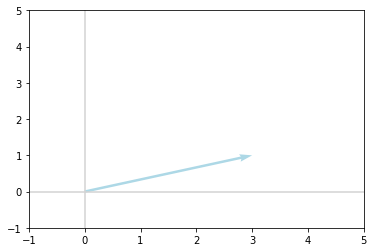

In [83]:
plot_vectors([v],['lightblue'])
plt.xlim(-1,5)
_ =plt.ylim(-1,5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [86]:
I = np.array([[1,0],[0,1]])
I

array([[1, 0],
       [0, 1]])

In [87]:
Iv = np.dot(I,v)
Iv

array([3, 1])


In contrast, consider this matrix (let's call it $E$) that flips vectors over the $x$-axis:

In [89]:
E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [90]:
Ev = np.dot(E,v)
Ev

array([ 3, -1])

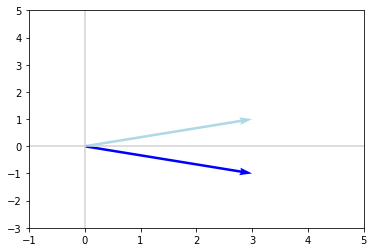

In [92]:
plot_vectors([v,Ev],['lightblue','blue'])
plt.xlim(-1,5)
_ =plt.ylim(-3,5)

Or, this matrix, $F$, which flips vectors over the $y$-axis

In [94]:
F = np.array([[-1,0],[0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [95]:
Fv = np.dot(F,v)
Fv

array([-3,  1])

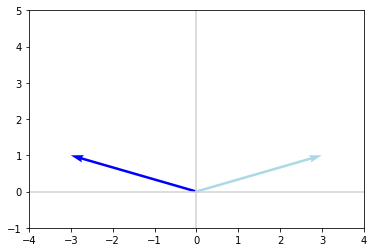

In [96]:
plot_vectors([v, Fv], ['lightblue', 'blue'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an affine transformation: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., reflection), other common affine transformations include:

- Scaling (changing the length of vectors)
- Shearing (example of this on the Mona Lisa coming up shortly)
- Rotation
(See here for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix $A$ to the vector $v$:

In [97]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [98]:
Av = np.dot(A, v)
Av

array([1, 4])

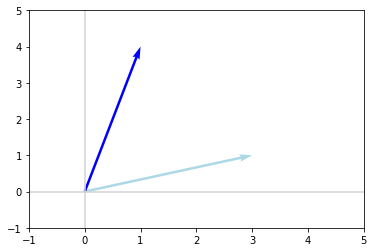

In [99]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

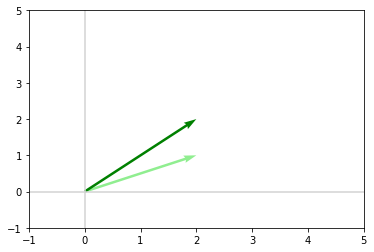

In [100]:
# Another example of applying A:
v2 = np.array([2, 1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector)

In [101]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T

matrix([[3],
        [1]])

In [102]:
v3 = np.array([-3, -1]) # mirror image of v over both axes
v4 = np.array([-1, 1])

In [103]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [104]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [105]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [106]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [107]:
vectorfy(V, 0)

array([3, 1])

In [108]:
vectorfy(V, 0) == v

array([ True,  True])

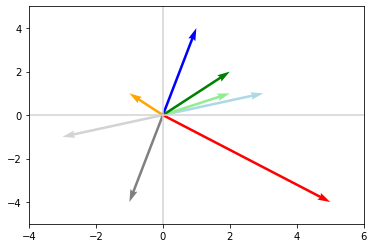

In [109]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

Now that we can appreciate the linear transformation of vectors by matrices, let's move on to working with eigenvectors and eigenvalues..